In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 500) #to show all the rows

%matplotlib inline 

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
url = "/Users/karollvivianalopezvillegas/00_Ironhack_exercises/amz_uk_price_prediction_dataset.csv"

In [6]:
df = pd.read_csv(url)

In [7]:
df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [8]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                                   836265
Beauty                                               19312
Handmade Clothing, Shoes & Accessories               19229
Bath & Body                                          19092
Birthday Gifts                                       18978
Manicure & Pedicure Products                         18940
Skin Care                                            18769
Make-up                                              18756
Hair Care                                            18735
Fragrances                                           18564
Handmade Gifts                                       18295
Handmade Home Décor                                  18146
Luggage and travel gear                              18142
Handmade Jewellery                                   18044
Handmade Artwork                                     17878
Women                                                17772
Handmade Home & Kitchen Products               

In [9]:
frequency_table.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [10]:
df_top_5 = frequency_table.head(5)
df_top_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

SPORTS AND OUTDOORS

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts')])

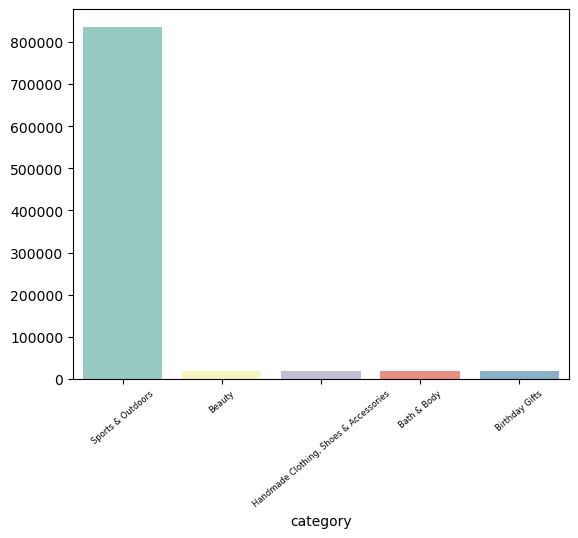

In [11]:
sns.barplot(x=df_top_5.index, y=df_top_5.values, palette="Set3")
plt.xticks(rotation=40, fontsize = 6) 

<Axes: ylabel='count'>

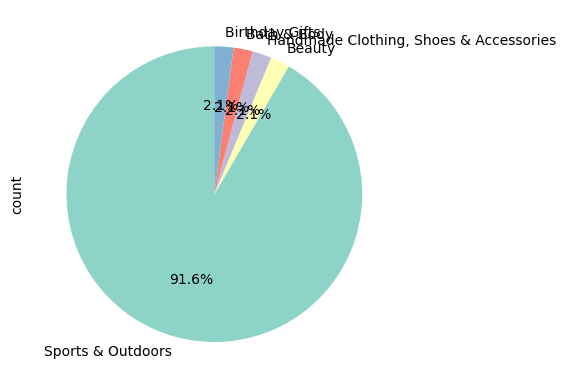

In [12]:
df_top_5.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

Measures of Centrality:
Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? Rta. 89.24
How does this compare with the most common price point (mode)?  Rta. 9.99

In [13]:
mean_price = df['price'].mean().round(2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24, 19.09, 9.99)

Measures of Dispersion:
Determine the variance, standard deviation, range, and interquartile range for product price.

How varied are the product prices? 
Very much variation for the prices, in a range from cero to 100,000.


Are there any indicators of a significant spread in prices? 
The range and the standard deviation (345.61). Besides the mean is above the 75% quartile. 

In [14]:
variance_price = round(df['price'].var(),2)
std_dev_price = round(df['price'].std(),2)
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.49,
 345.61,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [15]:
df.price.describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

Visualizations:

Is there a specific price range where most products fall? 
Rta. 75% of the products have a price under 45.99 

Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.
Rta. Two reasons, hard to visualiza: the large range and the 50% of the products with prices low (above 19.09).
It could be solved by eliminating the outliers, and may be ploting for the first 75%

Are there products that are priced significantly higher than the rest? Rta. YES!
Use a box plot to showcase the spread and potential outliers in product pricing.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

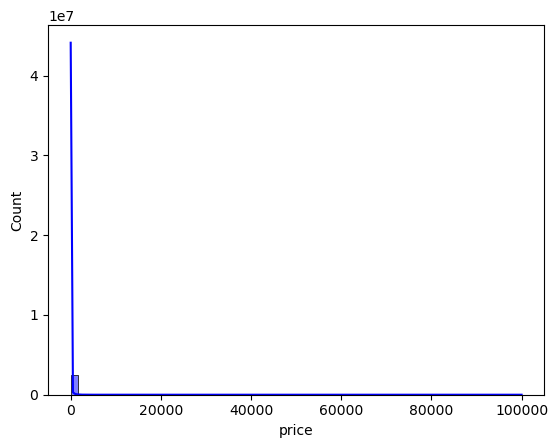

In [16]:
sns.histplot(df['price'], kde=True, bins=60, color="blue")

<Axes: >

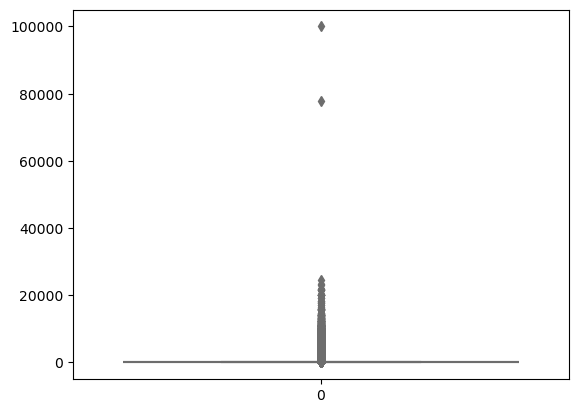

In [17]:
sns.boxplot(data = df['price'], color="salmon")

In [18]:
df["price"].value_counts()

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

In [19]:
df_cero = df[df['price'] == 0]

In [20]:
df_cero["price"].value_counts()

price
0.0    20
Name: count, dtype: int64

In [21]:
df_nueve = df[df['price'] == 9.99]

In [22]:
df_nueve["price"].value_counts()

price
9.99    48922
Name: count, dtype: int64

In [23]:
df_price_filtered = df[df["price"] <= 50]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

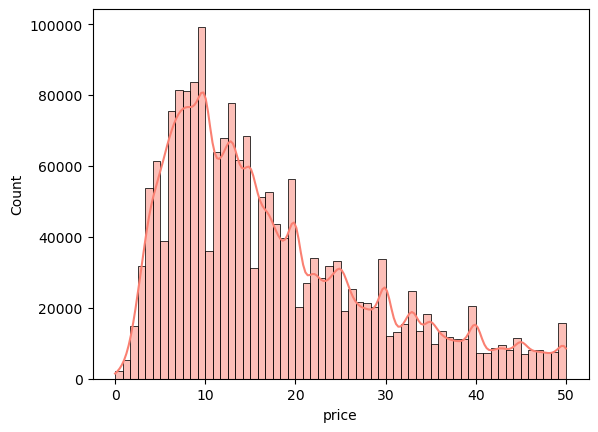

In [24]:
sns.histplot(df_price_filtered['price'], kde=True, bins=60, color="salmon")

Measures of Centrality:
Calculate the mean, median, and mode for the rating of products.

How do customers generally rate products? 
Rta. Normally CERO or they don't rate them

Is there a common trend?
CERO

In [25]:
mean_stars = df['stars'].mean().round(2)
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]

mean_stars, median_stars, mode_stars

(2.15, 0.0, 0.0)

Measures of Dispersion:
Determine the variance, standard deviation, and interquartile range for product rating.

Are the ratings consistent, or is there a wide variation in customer feedback?
There is a wide variation. Hypothesis: most of the clients don't rate the products.

In [26]:
variance_stars = round(df['stars'].var(),2)
std_dev_stars = round(df['stars'].std(),2)
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

variance_stars, std_dev_stars, min_stars, max_stars, range_stars, quantiles_stars

(4.82,
 2.19,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

Shape of the Distribution:
Calculate the skewness and kurtosis for the rating column.

Are the ratings normally distributed, or do they lean towards higher or lower values?

They are not normally distributed. They have a negative skewness 

In [27]:
skewness_price = round(df['stars'].skew(),2)
kurtosis_price = round(df['stars'].kurtosis(),2)

skewness_price, kurtosis_price

(0.08, -1.93)

Visualizations:
Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [ ]:
sns.histplot(df['stars'], kde=True, bins=60, color="blue")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()